<a href="https://colab.research.google.com/github/covillarreal/AprendizajeAutomatico/blob/main/VILLARREAL_TP3_AA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Aprendizaje no supervisado

**CONSTANZA VILLARREAL**

## Indicaciones b√°sicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compa√±ero.

4) copias expl√≠citas de secciones enteras del trabajo de otro ser√° penalizado disminuyendo su puntuaci√≥n.

5) No se olvide de a√±adir las fuentes de inspiraci√≥n de su c√≥digo (blogs, prompts de chatgpt o similar).

6) Adem√°s de todo el c√≥digo que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada secci√≥n. Esto le ayudar√° al momento del coloquio / parcial

7) Revise las fecha l√≠mite de entrega de este trabajo


#**Tarea: Entrenamiento y evaluaci√≥n de clasificadores**  
**Objetivo**: Aplicar un modelo de clasificaci√≥n a un dataset de su elecci√≥n, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.




## **Instrucciones**:

#1. **Selecci√≥n del Dataset**  ü™Ñ
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables num√©ricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligi√≥. Continue al siguiente punto.  

DATASET UTILIZADO: [WINE](https://archive.ics.uci.edu/dataset/109/wine)

* Descripci√≥n: Diferencia tipos de vino a partir de caracter√≠sticas qu√≠micas.

* Variables: 13 variables num√©ricas que describen componentes qu√≠micos del vino

* Instancias: 178

* Clases: 3 tipos de vino (multiclase)

* Valores nulos: No tiene

## Resoluci√≥n:

Importo librerias y configuraciones generales:

In [ ]:
import numpy as np               # arreglos, matem√°ticas
import pandas as pd              # tablas, datos

import matplotlib.pyplot as plt  # graficos simples
import seaborn as sns            # graficos estadisticos

from sklearn.pipeline import Pipeline                  # encadenar pasos
from sklearn.compose import ColumnTransformer          # transformar columnas
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # escalar, codificar

from sklearn.model_selection import train_test_split, cross_val_score  # dividir datos, validaci√≥n cruzada
from sklearn.linear_model import LogisticRegression     # clasificaci√≥n
from sklearn.neighbors import KNeighborsClassifier       # clasificaci√≥n
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score # m√©tricas, evaluaci√≥n

In [ ]:
# Nombres de las columnas (seg√∫n documentaci√≥n de UCI)
columnas = [
    'Clase','Alcohol','√Åcido M√°lico','Ceniza','Alcalinidad de la Ceniza',
    'Magnesio','Fenoles Totales','Flavonoides','Fenoles No Flavonoides',
    'Proantocianinas','Intensidad de Color','Matiz',
    'OD280/OD315 del Vino','Prolina'
]
# Cargar el dataset
df = pd.read_csv('wine.data.csv', header=None, names=columnas)

# Vista previa
df.head()

Clase  Alcohol  √Åcido M√°lico  Ceniza  Alcalinidad de la Ceniza  Magnesio  \
0      1    14.23          1.71    2.43                      15.6       127   
1      1    13.20          1.78    2.14                      11.2       100   
2      1    13.16          2.36    2.67                      18.6       101   
3      1    14.37          1.95    2.50                      16.8       113   
4      1    13.24          2.59    2.87                      21.0       118   

   Fenoles Totales  Flavonoides  Fenoles No Flavonoides  Proantocianinas  \
0             2.80         3.06                    0.28             2.29   
1             2.65         2.76                    0.26             1.28   
2             2.80         3.24                    0.30             2.81   
3             3.85         3.49                    0.24             2.18   
4             2.80         2.69                    0.39             1.82   

   Intensidad de Color  Matiz  OD280/OD315 del Vino  Prolina  
0                 5.64   1.04                  3.92     1065  
1                 4.38   1.05                  3.40     1050  
2                 5.68   1.03                  3.17     1185  
3                 7.80   0.86                  3.45     1480  
4                 4.32   1.04                  2.93      735



Primero importo las librer√≠as necesarias: pandas (como pd), que utilizo para manipular y analizar datos; matplotlib.pyplot (como plt), que me sirve para crear gr√°ficos; y seaborn (como sns), que es una librer√≠a que mejora la visualizaci√≥n de los datos, haci√©ndola m√°s est√©tica y sencilla de usar.

Luego, defino una lista de nombres de columnas, que corresponden a las caracter√≠sticas de un conjunto de datos relacionado con vinos que he sacado la informacion de la p√°gina proporcionada. Estos nombres los asigno a la variable columnas.

Despu√©s, cargo el conjunto de datos llamado 'wine.data.csv' que seleccione para trabajar utilizando pandas con el m√©todo read_csv(). Este m√©todo lee el archivo CSV y lo convierte en un DataFrame (una estructura de datos tabular) al que le asigno los nombres de las columnas definidos previamente. Finalmente, imprimo las primeras filas del DataFrame con df.head() para ver c√≥mo luce el conjunto de datos cargado.


In [ ]:
df.head()

Clase  Alcohol  √Åcido M√°lico  Ceniza  Alcalinidad de la Ceniza  Magnesio  \
0      1    14.23          1.71    2.43                      15.6       127   
1      1    13.20          1.78    2.14                      11.2       100   
2      1    13.16          2.36    2.67                      18.6       101   
3      1    14.37          1.95    2.50                      16.8       113   
4      1    13.24          2.59    2.87                      21.0       118   

   Fenoles Totales  Flavonoides  Fenoles No Flavonoides  Proantocianinas  \
0             2.80         3.06                    0.28             2.29   
1             2.65         2.76                    0.26             1.28   
2             2.80         3.24                    0.30             2.81   
3             3.85         3.49                    0.24             2.18   
4             2.80         2.69                    0.39             1.82   

   Intensidad de Color  Matiz  OD280/OD315 del Vino  Prolina  
0                 5.64   1.04                  3.92     1065  
1                 4.38   1.05                  3.40     1050  
2                 5.68   1.03                  3.17     1185  
3                 7.80   0.86                  3.45     1480  
4                 4.32   1.04                  2.93      735


## 2. **An√°lisis exploratorio (previo al modelado)**   üîéüìä
   - Describan las variables (media, distribuci√≥n, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gr√°ficos de dispersi√≥n (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resoluci√≥n:

Con esta l√≠nea de c√≥digo, lo que hago es generar una descripci√≥n estad√≠stica del DataFrame df usando el m√©todo describe(). Este m√©todo me proporciona informaci√≥n clave sobre cada una de las columnas num√©ricas del conjunto de datos, como:

* Cuenta (count): El n√∫mero de valores no nulos que tiene cada columna.

* Media (mean): El valor promedio de cada columna.

* Desviaci√≥n est√°ndar (std): Cu√°nto var√≠an los valores de cada columna respecto a la media.

* M√≠nimo (min): El valor m√°s bajo de cada columna.

* Cuartiles (25%, 50%, 75%): Los valores que dividen los datos en cuartiles. El 50% es la mediana, y los otros dos valores son el primer y tercer cuartil.

* M√°ximo (max): El valor m√°s alto de cada columna.

Esto me ayuda a obtener una visi√≥n general r√°pida de c√≥mo est√°n distribuidos los datos y si existen valores at√≠picos o alguna columna que tenga datos extra√±os o faltantes.

In [ ]:
df.describe() #descripcion estadistica

Clase     Alcohol  √Åcido M√°lico      Ceniza  \
count  178.000000  178.000000    178.000000  178.000000   
mean     1.938202   13.000618      2.336348    2.366517   
std      0.775035    0.811827      1.117146    0.274344   
min      1.000000   11.030000      0.740000    1.360000   
25%      1.000000   12.362500      1.602500    2.210000   
50%      2.000000   13.050000      1.865000    2.360000   
75%      3.000000   13.677500      3.082500    2.557500   
max      3.000000   14.830000      5.800000    3.230000   

       Alcalinidad de la Ceniza    Magnesio  Fenoles Totales  Flavonoides  \
count                178.000000  178.000000       178.000000   178.000000   
mean                  19.494944   99.741573         2.295112     2.029270   
std                    3.339564   14.282484         0.625851     0.998859   
min                   10.600000   70.000000         0.980000     0.340000   
25%                   17.200000   88.000000         1.742500     1.205000   
50%                   19.500000   98.000000         2.355000     2.135000   
75%                   21.500000  107.000000         2.800000     2.875000   
max                   30.000000  162.000000         3.880000     5.080000   

       Fenoles No Flavonoides  Proantocianinas  Intensidad de Color  \
count              178.000000       178.000000           178.000000   
mean                 0.361854         1.590899             5.058090   
std                  0.124453         0.572359             2.318286   
min                  0.130000         0.410000             1.280000   
25%                  0.270000         1.250000             3.220000   
50%                  0.340000         1.555000             4.690000   
75%                  0.437500         1.950000             6.200000   
max                  0.660000         3.580000            13.000000   

            Matiz  OD280/OD315 del Vino      Prolina  
count  178.000000            178.000000   178.000000  
mean     0.957449              2.611685   746.893258  
std      0.228572              0.709990   314.907474  
min      0.480000              1.270000   278.000000  
25%      0.782500              1.937500   500.500000  
50%      0.965000              2.780000   673.500000  
75%      1.120000              3.170000   985.000000  
max      1.710000              4.000000  1680.000000

üìå Conclusiones clave

Hay varias variables con valores at√≠picos o asimetr√≠as, como:

* √Åcido M√°lico, Alcalinidad de la Ceniza, Magnesio, Color, y sobre todo Prolina.

Esto sugiere que:

* Hay vinos qu√≠micamente muy distintos entre s√≠.

* Algunas clases pueden tener caracter√≠sticas qu√≠micas mucho m√°s marcadas que otras.

Estos outliers no necesariamente son errores, pero es importante escalarlos y analizarlos con cuidado antes de aplicar modelos.

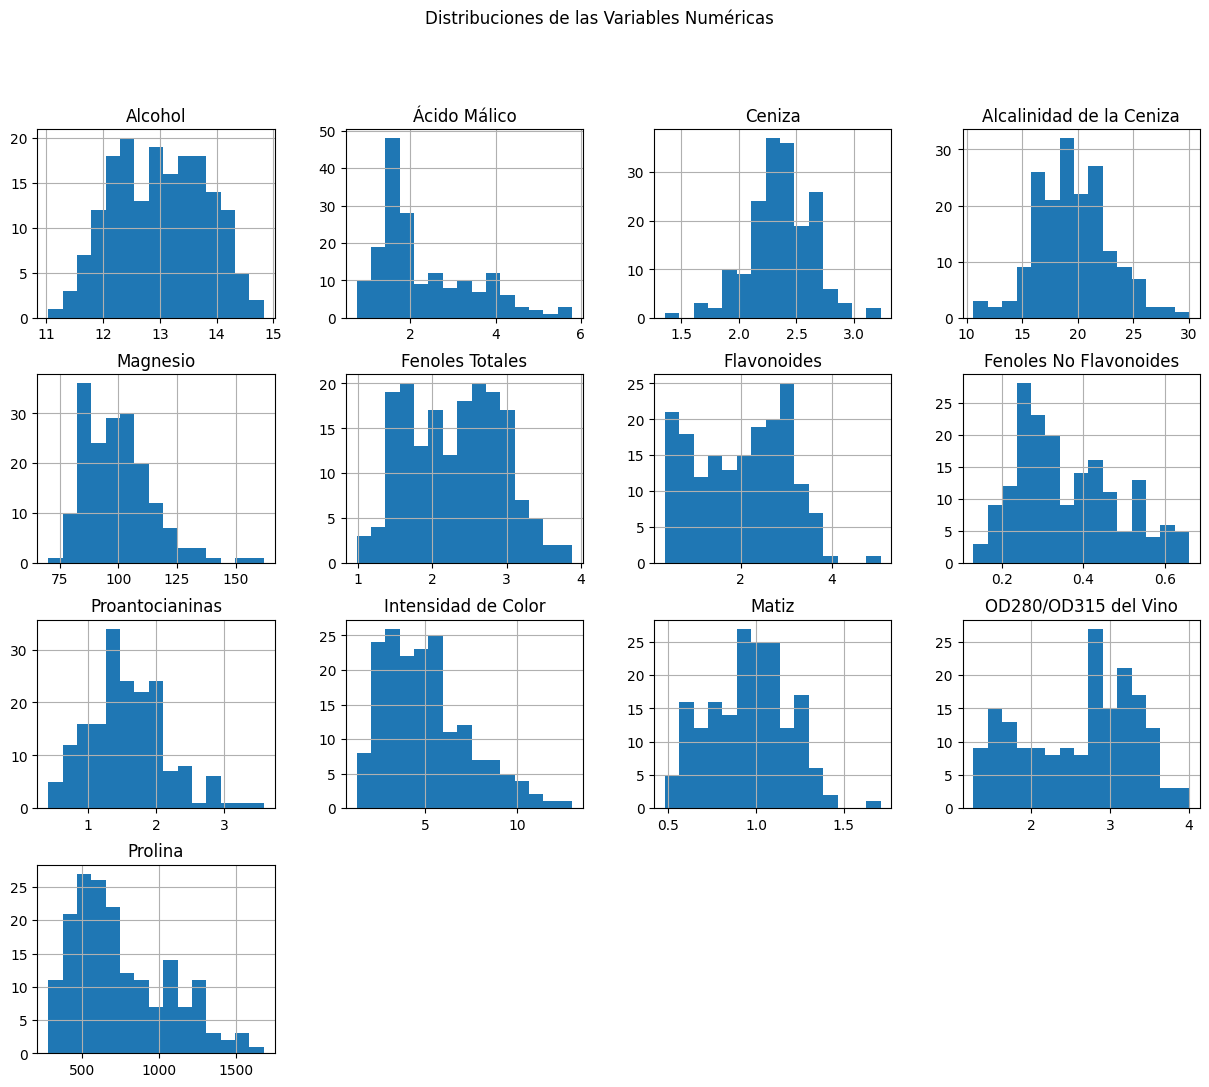

In [ ]:
df.drop('Clase', axis=1).hist(figsize=(15, 12), bins=15)
plt.suptitle("Distribuciones de las Variables Num√©ricas")
plt.show()

Con este bloque de c√≥digo, lo que hago es lo siguiente:

Primero, elimino la columna 'Clase' del DataFrame df utilizando el m√©todo drop(). Como no me interesa esta columna para el an√°lisis de distribuciones num√©ricas, la dejo fuera. La opci√≥n axis=1 indica que quiero eliminar una columna, no una fila.

Luego, genero un histograma para cada una de las variables num√©ricas restantes del DataFrame. Para ello, uso el m√©todo hist(), que crea un histograma para cada columna num√©rica. La opci√≥n figsize=(15, 12) especifica el tama√±o de la figura para que los gr√°ficos sean lo suficientemente grandes y f√°ciles de leer. La opci√≥n bins=15 indica que cada histograma tendr√° 15 intervalos (o "bins").

Finalmente, a√±ado un t√≠tulo general a la figura utilizando plt.suptitle() y luego muestro los gr√°ficos con plt.show(). Esto me permite ver c√≥mo se distribuyen los datos de cada una de las variables num√©ricas en el conjunto de datos.

Se puede observar rapidamente que se encuentran valores extremos pero no en mucha cantidad. En Ceniza podemos observar que es el que mas valores atipicos tiene.
Ahora analizaremos con el Z-Score que es una forma de medir cu√°ntos desv√≠os est√°ndar est√° un valor respecto a la media. Un Z-score muy alto suele considerarse outlier

In [ ]:
from scipy import stats

x = df.drop('Clase', axis=1)
z_scores = stats.zscore(x)

In [ ]:
# detectar outliers (3+ sigmas, 99% de los datos)
outliers = np.abs(z_scores) > 3

# contar filas con 1+ outliers
outliers_per_row = outliers.any(axis=1).sum()

print('Filas con 1+ outliers: ', outliers_per_row)
print('Total de outliers:     ', outliers.sum().sum())
print('Detalle por feature:', outliers.sum(axis=0))

Filas con 1+ outliers:  10
Total de outliers:      11
Detalle por feature: [0 1 3 1 2 0 1 0 1 1 1 0 0]


Como vimos en el grafico anteriormente, podemos ver de nuevo que tengo en total 11 outliers, solo 2 con mas de 1 que son:
* Ceniza tiene 3 outliers

* Magnesium tiene 2

El resto solo 1, entonces los valores estan dispersos y puede que sea un ruido normal, no errores.
Tambien puedo decir que 10 filas con al menos un outlier de un total de 178 -> poco m√°s del 5% -> no parece excesivo.

Tomare la decisi√≥n de no eliminarlos por el momento

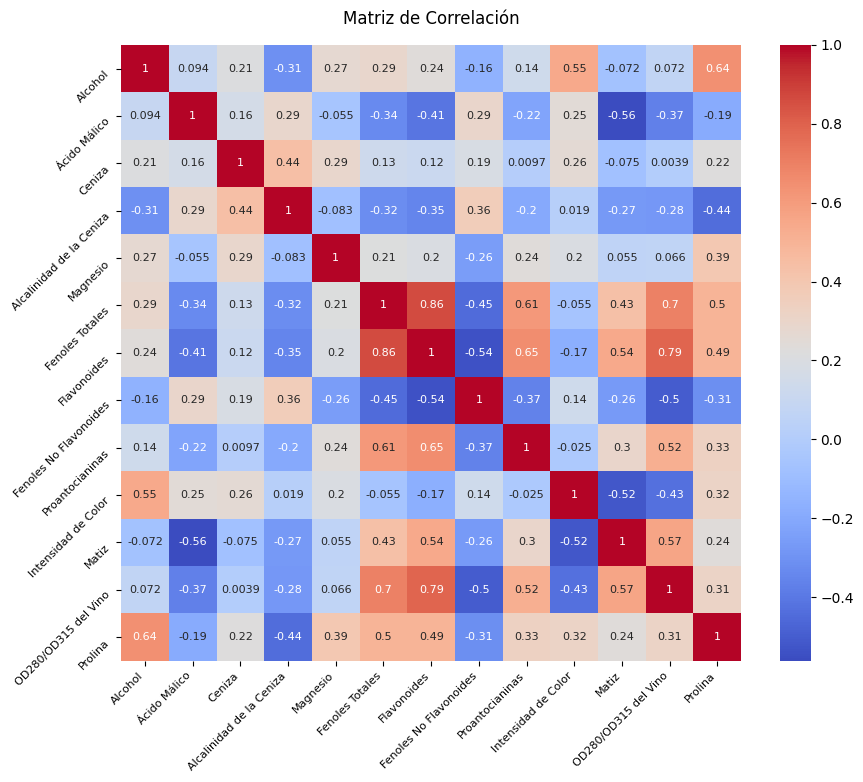

In [ ]:
correlation = x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de Correlaci√≥n', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)   # rotar los label a 45 grados y alinear su texto
plt.yticks(rotation=45, va='top', fontsize=8)     # rotar los label a 45 grados y alinear su texto
plt.show()

**DESCRIPCI√ìN SENCILLA DE LAS FEATURES PRINCIPALES:**
* Alcohol:
  
  ‚Üí Representa el porcentaje de alcohol en el vino.
  
  ‚Üí Afecta al cuerpo, sabor y fuerza del vino.

* √Åcido M√°lico:
  
  ‚Üí Es un √°cido natural presente en las uvas.
  
  ‚Üí Aporta acidez, pero disminuye a medida que la uva madura.

* Flavonoides:

  ‚Üí Son compuestos que influyen en el sabor, el color y los beneficios para la salud del vino.

  ‚Üí M√°s flavonoides suelen estar relacionados con vinos m√°s intensos o de mayor calidad.

* Prolina:

  ‚Üí Es un amino√°cido que aparece en mayor cantidad en vinos m√°s maduros.

  ‚Üí Puede estar asociado con la calidad del vino.

* OD280/OD315 del Vino:

  ‚Üí Es una medida t√©cnica que eval√∫a la cantidad de ciertos compuestos fen√≥licos.

  ‚Üí Estos compuestos est√°n relacionados con el color y sabor del vino.

* Clase:

  ‚Üí Es la categor√≠a o tipo de vino al que pertenece (por ejemplo, tipo 1, 2 o 3).

*Esta informacion la busqu√© en internet y ChatGpt para tener mayor conocimiento del tema y analizar con un poco mas de contexto*

**Correlaciones Positivas Fuertes (mayores a 0.7)**

Estas variables aumentan juntas:

* Fenoles Totales y Flavonoides: 0.86

  * Muy l√≥gico, ya que los flavonoides son un tipo de fenol.

* OD280/OD315 del Vino y Flavonoides: 0.79

  * Es probable que esta medici√≥n est√© captando la presencia de flavonoides.

* Prolina y OD280/OD315 del Vino: 0.64

  * Tal vez ambas caracter√≠sticas est√©n relacionadas con la madurez de la uva o calidad del vino.

* Prolina y Fenoles Totales: 0.70

* Magnesio y Fenoles Totales: 0.64

**Correlaciones Negativas Fuertes (menores a -0.5)**

Estas variables aumentan en direcciones opuestas:

* √Åcido M√°lico y Flavonoides: -0.56

  * Puede indicar un balance qu√≠mico: cuando hay m√°s flavonoides, menos √°cido m√°lico.

* √Åcido M√°lico y OD280/OD315 del Vino: -0.56

* Intensidad de Color y Flavonoides: -0.52

  * Puede ser que ciertos tipos de flavonoides no est√°n relacionados con el color.

**Correlaciones Medias (0.4 a 0.6)**
* Alcohol y Prolina: 0.64

* Alcohol y Intensidad de Color: 0.55

  * Parece que hay una ligera relaci√≥n entre alcohol y color, interesante desde el punto de vista enol√≥gico.

* Fenoles No Flavonoides y Fenoles Totales: 0.61

**Variables poco correlacionadas (casi 0)**

Ceniza, Matiz y √Åcido M√°lico est√°n muy cerca de 0 con muchas variables.

Esto no significa que no sean √∫tiles, pero pueden no estar linealmente relacionadas con las otras.

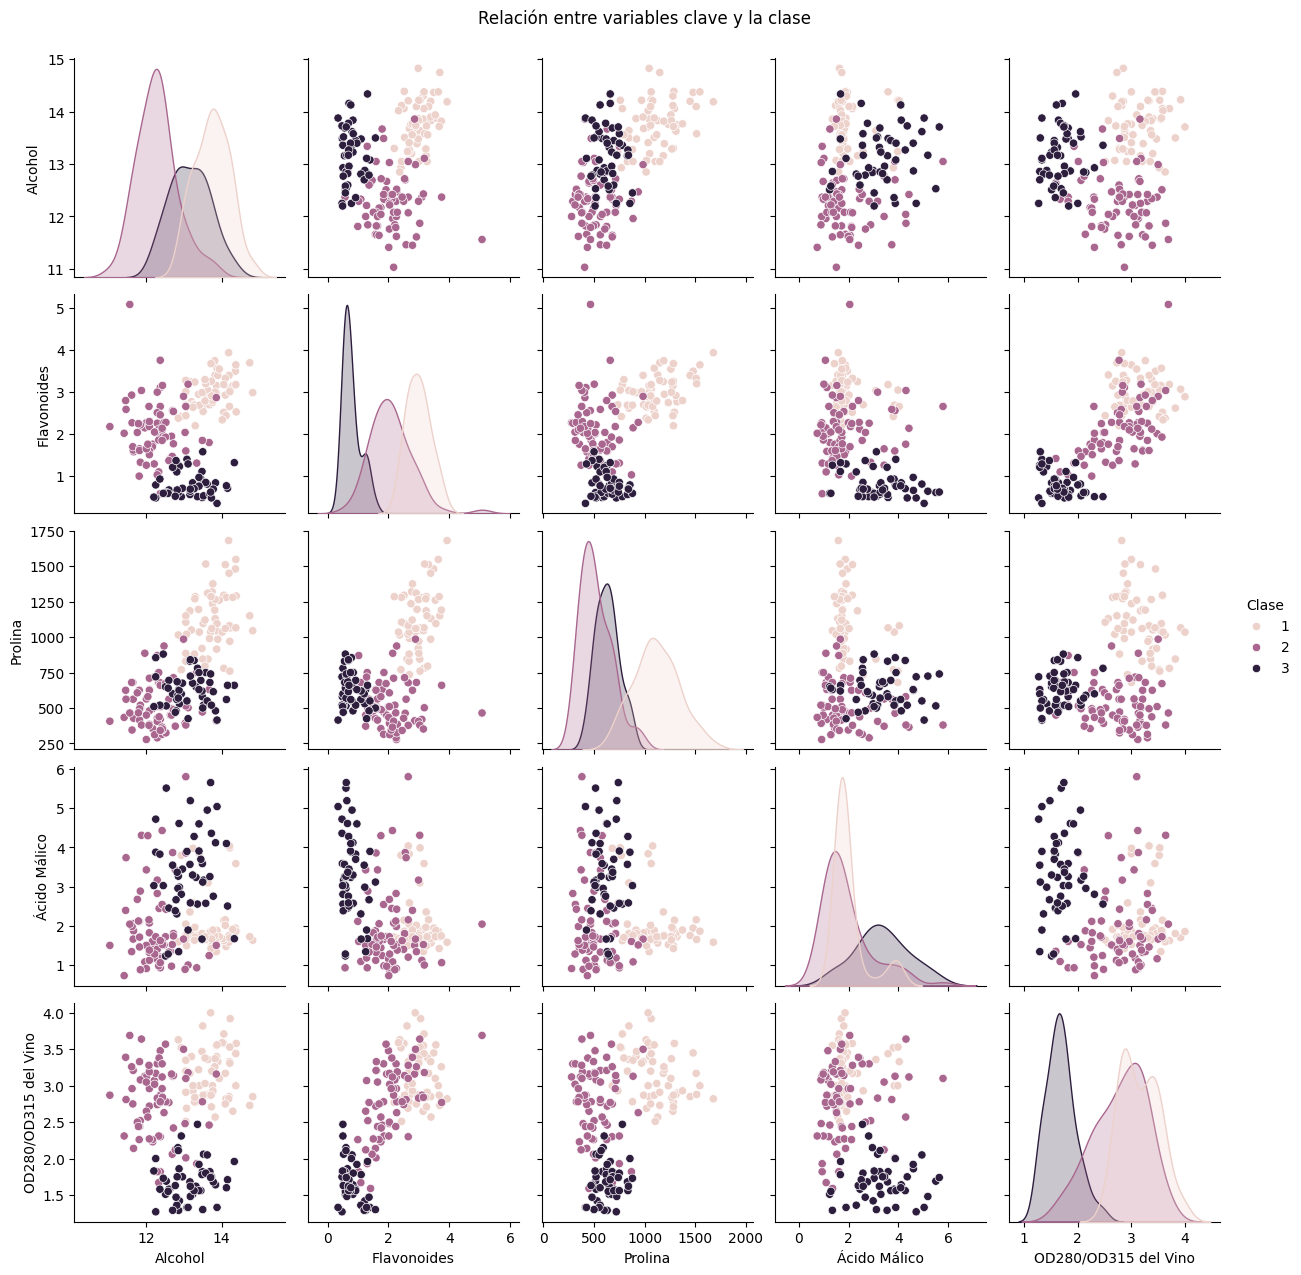

In [ ]:
# Gr√°fico de pares con nombres de columnas
sns.pairplot(df[['Alcohol','Flavonoides', 'Prolina', '√Åcido M√°lico', 'OD280/OD315 del Vino', 'Clase']], hue='Clase')
plt.suptitle("Relaci√≥n entre variables clave y la clase", y=1.02)
plt.show()

Como podemos observar se sigue reflejando la correlacion que analic√© anteriormente, las correlaciones positivas, negativas y la casi nula. En general se puede ver que la distribucion entre clases es bastante clara

En este bloque de c√≥digo, lo que hago es generar una matriz de gr√°ficos de dispersi√≥n (scatter plots) entre algunas variables del DataFrame, con la ayuda de seaborn y su funci√≥n pairplot().

Primero, selecciono un subconjunto de las columnas del DataFrame df que quiero analizar. Esas son las variables que se van a comparar entre s√≠ en los gr√°ficos.

Luego, utilizo la funci√≥n sns.pairplot() para crear los gr√°ficos de dispersi√≥n entre todas las combinaciones posibles de estas columnas seleccionadas. Adem√°s, paso el argumento hue='Clase' para que cada punto de los gr√°ficos se coloree de acuerdo con la columna 'Clase', que es la variable objetivo (en este caso, la clase de vino). Esto me permite ver c√≥mo se agrupan las diferentes clases de vino seg√∫n estas caracter√≠sticas.

Finalmente, a√±ado un t√≠tulo general con plt.suptitle("Relaci√≥n entre algunas variables clave y la clase") y muestro la matriz de gr√°ficos con plt.show().

El resultado es una visualizaci√≥n que me ayuda a entender c√≥mo se relacionan las variables seleccionadas entre s√≠ y c√≥mo estas relaciones difieren entre las distintas clases de vino.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cu√°les features descarta. Justifique.
   - Indique si usar√° o no variables categ√≥ricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)


Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras caracter√≠sticas que crea conveniente.

Realice la divisi√≥n de datos (entrenamiento / testeo / CV seg√∫n corresponda)

## Resoluci√≥n:

**CARACTERISTICAS GENERALES DEL DATASET**
* Descripci√≥n: Diferencia tipos de vino a partir de caracter√≠sticas qu√≠micas.

* Variables: 13 variables num√©ricas que describen componentes qu√≠micos del vino

* Instancias: 178

* Clases: 3 tipos de vino (multiclase)

* Valores nulos: No tiene

In [ ]:
# Revisamos si hay valores nulos en el dataset
df.isnull().sum()

Clase                       0
Alcohol                     0
√Åcido M√°lico                0
Ceniza                      0
Alcalinidad de la Ceniza    0
Magnesio                    0
Fenoles Totales             0
Flavonoides                 0
Fenoles No Flavonoides      0
Proantocianinas             0
Intensidad de Color         0
Matiz                       0
OD280/OD315 del Vino        0
Prolina                     0
dtype: int64

Con esta l√≠nea de c√≥digo, lo que hago es revisar si hay valores nulos (es decir, datos faltantes) en el DataFrame df. Utilizo el m√©todo isnull() para identificar las celdas que contienen valores nulos, lo que me devuelve un DataFrame de valores booleanos (True para los valores nulos y False para los valores no nulos).

Luego, con .sum(), sumo los valores True (que representan los valores nulos) por cada columna. Esto me muestra cu√°ntos valores nulos hay en cada columna del conjunto de datos.

De esta manera, puedo identificar r√°pidamente si existe alg√∫n problema con los datos faltantes y saber en qu√© columnas podr√≠a necesitar realizar alg√∫n tratamiento o limpieza de datos.

1. No se encuentran valores faltantes.
2. No voy a eliminar outliers por la justificacion que di anteriormente al momento de identificarlos.
3. Con el objetivo de simplificar el modelo (ya que no conozco en profundidad todas las variables qu√≠micas), decid√≠ eliminar las siguientes columnas:

  * Fenoles Totales: Muy correlacionada con Flavonoides (r = 0.86), me quedo con Flavonoides para evitar redundancia.

  * OD280/OD315 del Vino: Alta correlaci√≥n con Flavonoides y Prolina, por lo que ya estar√≠a representada de forma indirecta.

  * Prolina: Tambi√©n muy relacionada con otras variables como Fenoles y OD280/OD315.

  * Ceniza: Baja correlaci√≥n con casi todas las variables, no aporta mucho valor al modelo.

  * Matiz: Mismo caso que Ceniza, poca relaci√≥n con las dem√°s columnas.

  * √Åcido M√°lico: Tiene algunas correlaciones negativas pero en general poco clara su utilidad en un modelo simple.

In [ ]:
# Lista de columnas a eliminar
columnas_eliminar = [
    'Fenoles Totales',
    'OD280/OD315 del Vino',
    'Prolina',
    'Ceniza',
    'Matiz',
    '√Åcido M√°lico'
]

# Creo un nuevo DataFrame sin esas columnas
df_filtrado = df.drop(columns=columnas_eliminar)

# Verifico el nuevo DataFrame
print("Columnas restantes:", df_filtrado.columns.tolist())


Columnas restantes: ['Clase', 'Alcohol', 'Alcalinidad de la Ceniza', 'Magnesio', 'Flavonoides', 'Fenoles No Flavonoides', 'Proantocianinas', 'Intensidad de Color']




A continuaci√≥n, aplico el escalado a las caracter√≠sticas con StandardScaler de sklearn. Este es un tipo de normalizaci√≥n que transforma los datos de manera que tengan media cero y desviaci√≥n est√°ndar uno. Esto es √∫til para asegurar que todas las caracter√≠sticas tengan la misma escala, evitando que algunas variables dominen a otras debido a su magnitud.

Utilizo scaler.fit_transform(X) para ajustar el escalador a los datos de X (es decir, calcula la media y desviaci√≥n est√°ndar) y luego transformar esos datos, escal√°ndolos. El resultado es un nuevo conjunto de datos, X_scaled, que contiene las mismas caracter√≠sticas pero ahora en una escala est√°ndar.


In [ ]:
# Separar features (X) y variable objetivo (y)
X = df_filtrado.drop(columns=['Clase'])
y = df_filtrado['Clase']

# Crear el escalador
scaler = StandardScaler()

# Ajusto solo con el conjunto de entrenamiento
scaler.fit(X)

# Transformo los datos
X_scaled = scaler.transform(X)

# Verifico que la media sea 0 y la desviaci√≥n 1 (como debe ser tras escalar)
print("Media de X_scaled:", np.mean(X_scaled, axis=0))
print("Desv√≠o est√°ndar de X_scaled:", np.std(X_scaled, axis=0))


Media de X_scaled: [-8.38280756e-16 -3.99181312e-17 -3.99181312e-17 -3.99181312e-16
  3.59263181e-16 -1.19754394e-16  2.49488320e-17]
Desv√≠o est√°ndar de X_scaled: [1. 1. 1. 1. 1. 1. 1.]


Los valores de media est√°n pr√°cticamente en cero y el desv√≠o est√°ndar est√° justo en 1.

Esto confirma que la normalizaci√≥n se realiz√≥ correctamente y que el escalador est√° funcionando bien.

4. No hay variables categ√≥ricas entre las features, solo num√©ricas. Tengo "clase" que es el target pero tiene n√∫meros y Logistic Regression lo puede manejar





## 4. **Clasificaci√≥n con logistic regression**    üéØüß©

En este apartado entrenar√° un clasificador con la librer√≠a sklearn usando logistic regresion.
   

### 4.1 Entrenamiento y evaluaci√≥n



```
# # Cargar datos: Separar features (X) y variable objetivo (y)-> ya lo realice en el preprocesamiento
X = df_filtrado.drop(columns=['Clase'])
y = df_filtrado['Clase']
```



In [ ]:
print("Clases originales en y:", np.unique(y, return_counts=True))

Clases originales en y: (array([1, 2, 3]), array([59, 71, 48]))


In [ ]:
# Filtrar clases 1 y 2 antes de dividir
binary_mask = (y == 1) | (y == 2)
X_binary = X[binary_mask]
y_binary = y[binary_mask]
y_binary = y_binary.astype(int)

# Verificar las clases disponibles
print("Clases disponibles en y_binary:", np.unique(y_binary, return_counts=True))

# Dividir los datos en conjunto de entrenamiento y prueba de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Crear y entrenar el clasificador
clf = LogisticRegression(max_iter=1000) #aumente el numero de iteracion
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

Clases disponibles en y_binary: (array([1, 2]), array([59, 71]))


Decid√≠ hacerlo de esta manera porque la regresi√≥n log√≠stica trabaja con dos clases, y mi dataset ten√≠a tres. Para que el modelo funcionara sin problemas, filtr√© las clases 1 y 2, dejando fuera la clase 3 y convirtiendo el problema en una clasificaci√≥n binaria.
Adem√°s, divid√≠ los datos asegur√°ndome de que la proporci√≥n de clases se mantuviera equilibrada en entrenamiento y prueba. Tambi√©n aument√© el n√∫mero de iteraciones (1000), para darle al modelo m√°s oportunidades de mejorar sus predicciones.
Con este enfoque, adapt√© la regresi√≥n log√≠stica al dataset y mejor√© la estabilidad del modelo.

### 4.2 M√©tricas de evaluaci√≥n

Muestre el desempe√±o en el conjunto de datos de entrenamiento y testeo.
Mencione las m√©tricas utilizadas. No se olvide de mostrar la matriz de confusi√≥n.
Explique los resultados obtenidos.

In [ ]:
# Evaluar el modelo
print("Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Matriz de confusi√≥n:
[[17  1]
 [ 5 16]]
Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           1       0.77      0.94      0.85        18
           2       0.94      0.76      0.84        21

    accuracy                           0.85        39
   macro avg       0.86      0.85      0.85        39
weighted avg       0.86      0.85      0.85        39



Interpretaci√≥n:

- **Matriz de Confusi√≥n**:
  - 16 Verdaderos Negativos
  - 17 Verdaderos Positivos
  - 5 Falso Positivo (predijo clase 2, pero era clase 1).
  - 1 Falsos Negativos (predijo clase 1, pero era clase 2).
  
- **Exactitud (Accuracy)**: El modelo acert√≥ en el 84.6% de los casos.
- **Precisi√≥n (Precision)**: De todas las predicciones positivas, el 77% fueron correctas en clase 1 y el 94% en clase 2
- **Sensibilidad (Recall)**: El modelo identific√≥ correctamente el 94% de los casos positivos en clase 1 y 76% en clase 2.
- **F1-Score**: Una medida de balance entre precisi√≥n y sensibilidad, alcanzando 0.85 en clase 1 y 0.84 en clase 2

El modelo tuvo un buen rendimiento general, con un 84.6% de precisi√≥n en la clasificaci√≥n. Sin embargo, cometi√≥ algunos errores, especialmente confundiendo algunos ejemplos de la clase 2 con la clase 1. La sensibilidad en clase 1 (94%) fue alta, lo que indica que identific√≥ correctamente la mayor√≠a de los casos positivos, mientras que en clase 2 fue menor (76%).
En resumen, el modelo funciona bien, pero podr√≠a mejorar la identificaci√≥n de la clase 2 para reducir los falsos negativos.


## **5. Otro clasificador**

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los par√°metros por defecto de sklearn.

Justifique su elecci√≥n.

Eleg√≠ **K-Nearest Neighbors (KNN)** porque es un modelo f√°cil de entender que clasifica los datos seg√∫n sus vecinos m√°s cercanos. Como mi conjunto de datos tiene tres clases bien definidas, KNN funciona bien, ya que agrupa instancias similares. Aunque puede ser afectado por el ruido, elegir bien el valor de k y normalizar los datos ayuda a mejorar su rendimiento.


### 5.2 Entrenamiento del modelo.

Primero debo definir x e y que ya lo hice anteriormente:



```
# X = df_filtrado.drop(columns=['Clase'])
y = df_filtrado['Clase']
```





Para determinar el n√∫mero ideal de cl√∫sters se deber√≠a utilizar Silhoutte Score pero en mi caso voy a utilizar K=3 ya que es el numero de clases que tengo en el dataset. Luego hare el analisis final cambiando los valores de K.



In [ ]:
# Divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creo el modelo KNN con k=3 -> N√∫mero de clases
knn = KNeighborsClassifier(n_neighbors=3)

# Entreno el modelo
knn.fit(X_train, y_train)

# Hago predicciones
y_pred = knn.predict(X_test)

### 5.3 Evaluaci√≥n del desempe√±o

In [ ]:
# Eval√∫o el rendimiento del modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

           1       0.75      0.79      0.77        19
           2       0.74      0.81      0.77        21
           3       1.00      0.79      0.88        14

    accuracy                           0.80        54
   macro avg       0.83      0.79      0.81        54
weighted avg       0.81      0.80      0.80        54



Interpretaci√≥n:
  
- **Exactitud (Accuracy)**: El modelo acert√≥ en el 79.6% de los casos.
- **Precisi√≥n (Precision)**: De todas las predicciones positivas, el 75% fueron correctas en clase, el 74% en clase 2 y 100% clase 3.
- **Sensibilidad (Recall)**: El modelo identific√≥ correctamente el 79% de los casos positivos en clase 1, 81% en clase 2 y 79% en clase 3.
- **F1-Score**: Una medida de balance entre precisi√≥n y sensibilidad, alcanzando 0.77 en clase 1, 0.77 en clase 2 y 0.88 en clase 3.

El modelo de KNN con k=3 tuvo una precisi√≥n del 79.6%, acertando en la mayor√≠a de los casos.
- Clase 3 tuvo 100% de precisi√≥n, pero su recall fue 79%, lo que indica que identific√≥ la mayor√≠a de los casos correctamente.
- Clases 1 y 2 fueron m√°s equilibradas, con precisi√≥n y recall entre 75% y 81%.
En general, el modelo funcion√≥ bien, aunque podr√≠a mejorar la identificaci√≥n de algunas muestras en clases 1 y 2.

## **6.  Tuneo de hiperpar√°metros**

En esta secci√≥n debe modificar probar c√≥mo la modificaci√≥n de un hiperpar√°metro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta secci√≥n.

In [ ]:
# Probar diferentes valores de k
for k in [1, 5, 7, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"\nResultados para k={k}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Resultados para k=1:
Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

           1       0.83      0.79      0.81        19
           2       0.73      0.76      0.74        21
           3       0.86      0.86      0.86        14

    accuracy                           0.80        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54


Resultados para k=5:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.78      0.86      0.82        21
           3       1.00      0.79      0.88        14

    accuracy                           0.83        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.85      0.83      0.84        54


Resultados para k=7:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           1       0.84      0

**An√°lisis de la modificaci√≥n del hiperpar√°metro k**

Al cambiar k, observamos c√≥mo afecta la precisi√≥n y el rendimiento de la clasificaci√≥n:
- **Con k=1:**
  - La precisi√≥n es 79.6%, ligeramente m√°s baja que con valores mayores de k.
- **Con k=5:**
  - La precisi√≥n mejora a 83.3%, mostrando un mejor equilibrio entre las clases.
  - La clase 3 mantiene alta precisi√≥n (1.00), pero con menor sensibilidad (0.79).
- **Con k=7 y k=10:**
  - La precisi√≥n se mantiene en 83.3%, lo que indica estabilidad.
  - La clase 3 mejora su f1-score con k=10 (0.89), lo que sugiere que elegir un k ligeramente mayor ayuda a la clasificaci√≥n de esta clase.



AMPLIANDO LA INTERPRETACION k=5:
  
- **Exactitud (Accuracy)**: El modelo acert√≥ en el 83% de los casos.
- **Precisi√≥n (Precision)**: De todas las predicciones positivas, el 80% fueron correctas en clase, el 78% en clase 2 y 100% clase 3.
- **Sensibilidad (Recall)**: El modelo identific√≥ correctamente el 84% de los casos positivos en clase 1, 86% en clase 2 y 79% en clase 3.
- **F1-Score**: Una medida de balance entre precisi√≥n y sensibilidad, alcanzando 0.82 en clase 1, 0.82 en clase 2 y 0.88 en clase 3.

### **CONCLUS√çON DE KNN PARA DISTINTOS VALORES DE K**
Con KNN k=5, el modelo mejora su precisi√≥n y estabilidad, alcanzando una exactitud del 83% frente al 79.6% de k=3.
- Clase 1 y 2 muestran mejor precisi√≥n y recall con k=5, lo que indica que el modelo identifica mejor estas categor√≠as.
- Clase 3 mantiene 100% de precisi√≥n, pero su recall sigue en 79%, lo que sugiere que no todos los casos fueron correctamente reconocidos.

Por lo tanto, si bien k=3 parec√≠a una opci√≥n l√≥gica al inicio, los resultados muestran que k=5 o k=7 son mejores elecciones, ya que ofrecen mayor estabilidad y precisi√≥n al clasificar los tres tipos de vino. Adem√°s, es posible que la divisi√≥n entre clases haya sido afectada por la eliminaci√≥n de algunas features o la presencia de outliers, lo que podr√≠a haber influido en el rendimiento del modelo.


## **7. Conclusiones**

Fundamente, justifique con sus palabras.

Despu√©s de probar **Logistic Regression** y **KNN con k=5**, not√© que ambos modelos funcionan bien, pero tienen diferencias minimas en c√≥mo clasifican los vinos.

* Muy importante tener en cuenta que LR clasifica solo 2 clases ya que es binaria a diferencia de KNN que se tienen en cuenta todas las clases.
* Ambas tienen una exactitud (acurracy), predicci√≥n correcta, del 83%.
* En el caso de la precisi√≥n LG es mejor en la clase 1 (0.83 > 0.8).
* La sensibilidad (recall) en en KNN es levemente superior.
* Y por ultimo, F1-Score es similar en ambos. Por lo tanto, al ser relativamente alto indica un buen balance entre precisi√≥n y recall en LR y KNN.

Me he dado cuenta que KNN es mas sensible a valores atipicos (que los he dejado intactos) ya que clasifica los datos basandose en los vecinos mas cercanos. Pienso esto porque K=3 (un poco peque√±o), que en la logica seria el numero de clusters ideal ya que es la cantidad de clases de vinos en el dataset, tiene una exactitud menor que k=5.

Si revisara nuevamente los outliers y los trabajara de manera correcta, KNN seria el clasificador mas adecuando en mi caso ya que tiene 3 clases bien marcadas.

Esta comparaci√≥n me ayud√≥ a entender que la elecci√≥n de un modelo depende de lo que quiero priorizar en la clasificaci√≥n.


# Referencias

* Clases de la materia
* Chat GPT
* Copilot (IA de mi computadora)
* UCI plataforma del Dataset